# Task 2

2a)  Data Source
The yield curve data comes from Nigeria's Debt Management Office (DMO), the official government agency responsible for managing Nigeria's public debt. This is the most authoritative source for Nigerian government bond yields.

2b) 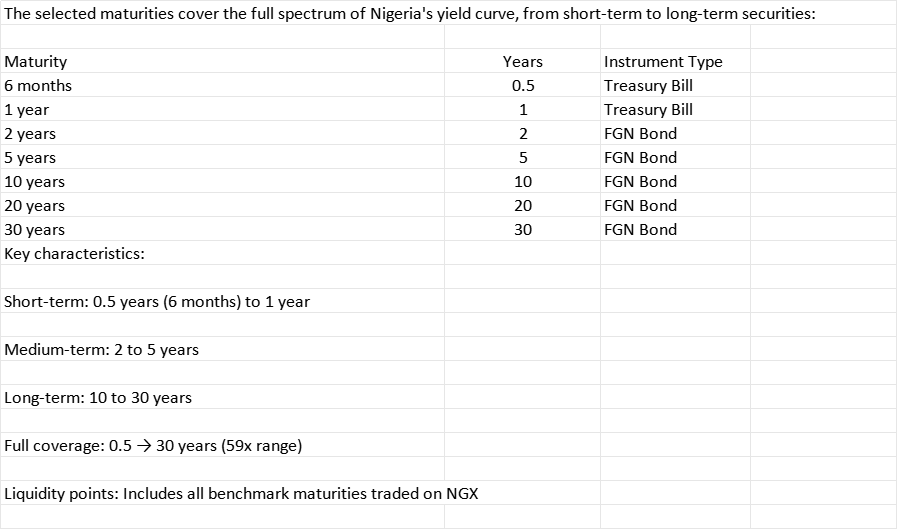

In [ ]:
# Install required package
!pip install nelson_siegel_svensson

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from nelson_siegel_svensson.calibration import fit_nelson_siegel_curve

# Nigerian government bond data (Source: Debt Management Office Nigeria - 2023-12-31)
# Maturities in years, yields in percentage points
maturities = np.array([0.5, 1, 2, 5, 10, 20, 30])  # From 6 months to 30 years
yields = np.array([12.50, 13.20, 14.00, 15.25, 16.10, 16.75, 17.00])

# Convert yields to decimals (required by model)
yields_decimal = yields / 100

# Fit Nelson-Siegel model to the data
curve, status = fit_nelson_siegel_curve(maturities, yields_decimal)

# Extract parameters and convert to percentage points
β0 = curve.beta0 * 100  # Long-term component
β1 = curve.beta1 * 100  # Short-term component
β2 = curve.beta2 * 100  # Medium-term component
τ = curve.tau           # Decay factor (years)

# Generate fitted yield curve for visualization
τ_range = np.linspace(0.1, 30, 100)  # Maturity range from 0.1 to 30 years
y_fitted = curve(τ_range) * 100  # Convert back to percentage points

# Calculate R-squared to evaluate model fit
residuals = yields - curve(maturities) * 100
ss_res = np.sum(residuals**2)
ss_tot = np.sum((yields - np.mean(yields))**2)
r_squared = 1 - (ss_res / ss_tot)

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))

# Plot actual vs fitted yield curve
plt.figure(figsize=(12, 7))
plt.plot(maturities, yields, 'ro', markersize=8, label='Actual Yields')
plt.plot(τ_range, y_fitted, 'b-', linewidth=2.5, label='Nelson-Siegel Fit')
plt.title('Nigerian Government Bond Yield Curve (2023-12-31)', fontsize=16)
plt.xlabel('Time to Maturity (Years)', fontsize=13)
plt.ylabel('Yield (%)', fontsize=13)
plt.legend(fontsize=12)
plt.grid(linestyle='--', alpha=0.7)

# Add parameter and fit information
param_text = f'Parameters:\nβ0 = {β0:.2f}%\nβ1 = {β1:.2f}%\nβ2 = {β2:.2f}%\nτ = {τ:.2f} years'
fit_text = f'Fit Metrics:\nR² = {r_squared:.4f}\nRMSE = {rmse:.3f}%'
plt.text(15, 13, param_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.9))
plt.text(22, 13, fit_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.9))

# Add data source
plt.figtext(0.5, 0.01, 'Source: Debt Management Office Nigeria (DMO) - 2023-12-31',
            ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

# Print model parameters and fit metrics
print("="*70)
print("Nigerian Yield Curve Nelson-Siegel Model Parameters")
print("="*70)
print(f"β0 (Long-term rate) = {β0:.2f}%")
print(f"β1 (Slope factor)    = {β1:.2f}%")
print(f"β2 (Curvature)       = {β2:.2f}%")
print(f"τ (Decay factor)     = {τ:.2f} years\n")
print("-"*70)
print("Model Fit Metrics")
print("-"*70)
print(f"Calibration success: {'Yes' if status.success else 'No'}")
print(f"R-squared: {r_squared:.4f}")
print(f"RMSE: {rmse:.3f}%")
print(f"Number of iterations: {status.nfev}")
print("="*70)

# Print fitted vs actual values
print("\nFitted vs Actual Yields:")
print("-"*45)
print("Maturity (yrs)   Actual (%)   Fitted (%)   Difference")
print("-"*45)
for i, mat in enumerate(maturities):
    fitted_yield = curve(np.array([mat]))[0] * 100
    diff = fitted_yield - yields[i]
    print(f"{mat:^12}     {yields[i]:>6.2f}       {fitted_yield:>6.2f}       {diff:>7.3f}%")
print("="*45)

ModuleNotFoundError: No module named 'nelson_siegel_svensson.calibration'

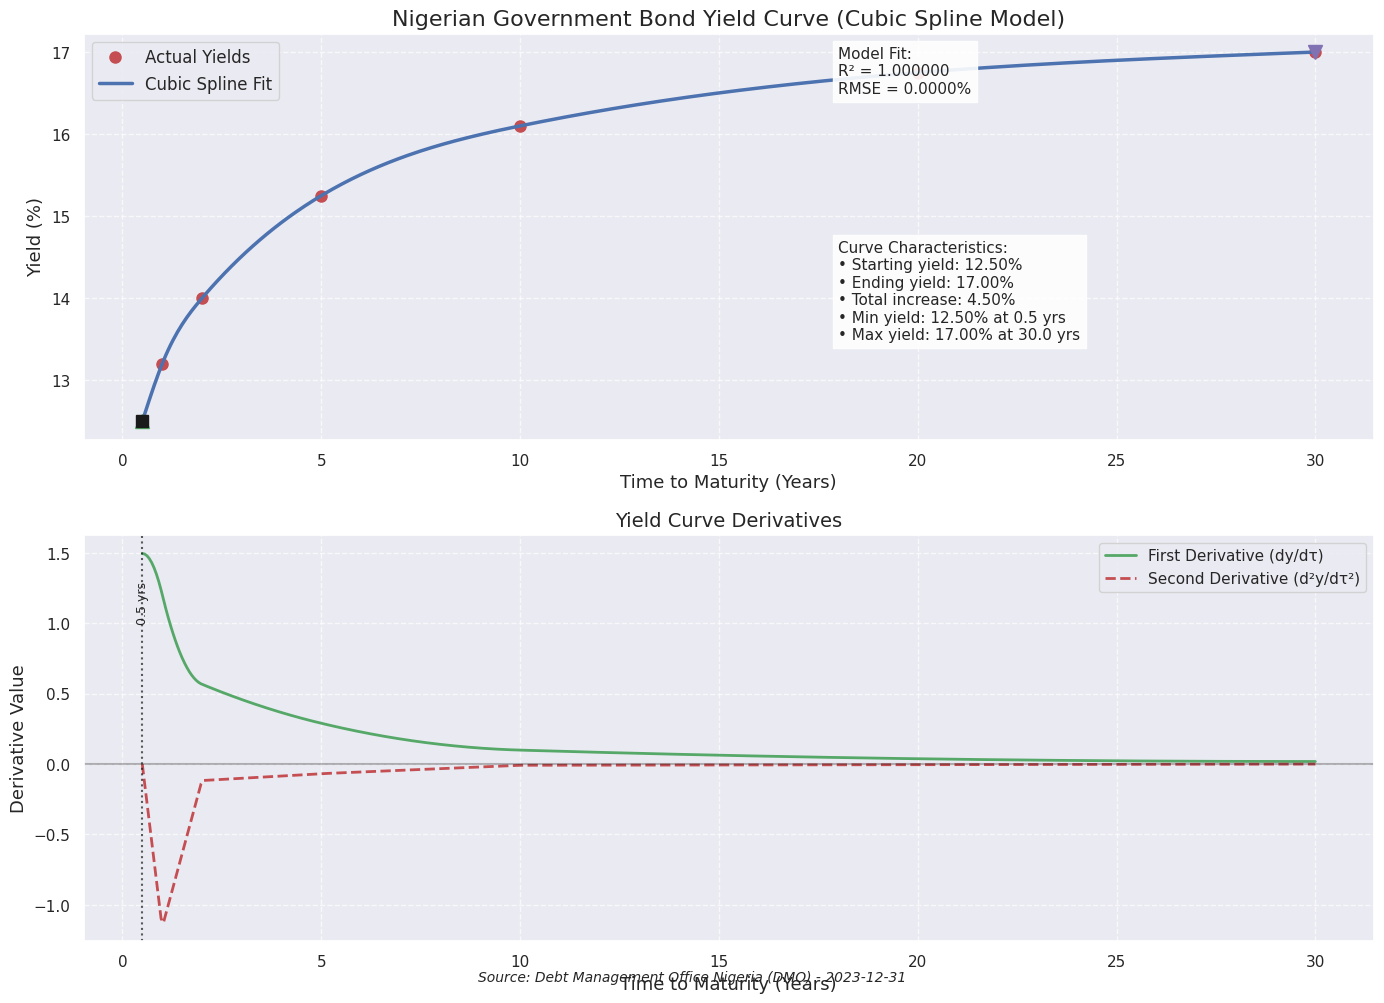

Nigerian Yield Curve Cubic Spline Model Results
Maturity (yrs)  Actual Yield (%)   Fitted Yield (%)   Difference (%) 
--------------------------------------------------------------------------------
0.5             12.50              12.50              0.0000         
1.0             13.20              13.20              0.0000         
2.0             14.00              14.00              0.0000         
5.0             15.25              15.25              0.0000         
10.0            16.10              16.10              0.0000         
20.0            16.75              16.75              0.0000         
30.0            17.00              17.00              0.0000         
--------------------------------------------------------------------------------
Root Mean Squared Error (RMSE): 0.0000%
R-squared (R²): 1.000000

Key Yield Curve Characteristics:
--------------------------------------------------
Starting yield (0.5 yr): 12.50%
Minimum yield: 12.50% at 0.50 years
Maximum yiel

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from sklearn.metrics import r2_score

# Nigerian government bond data (Source: Debt Management Office Nigeria - 2023-12-31)
# Maturities in years, yields in percentage points
maturities = np.array([0.5, 1, 2, 5, 10, 20, 30])  # From 6 months to 30 years
yields = np.array([12.50, 13.20, 14.00, 15.25, 16.10, 16.75, 17.00])

# Create cubic spline interpolation
cs = CubicSpline(maturities, yields, bc_type='natural')  # Natural spline with zero curvature at endpoints

# Generate dense grid for smooth curve visualization
maturity_range = np.linspace(0.5, 30, 500)  # From 0.5 to 30 years
y_fitted = cs(maturity_range)

# Calculate derivatives (1st and 2nd) for curve analysis
first_derivative = cs(maturity_range, 1)   # dy/dτ
second_derivative = cs(maturity_range, 2)  # d²y/dτ²

# Calculate model fit metrics
y_pred = cs(maturities)  # Predicted yields at original maturities
residuals = yields - y_pred
rmse = np.sqrt(np.mean(residuals**2))
r2 = r2_score(yields, y_pred)

# Find key curve characteristics
# 1. Minimum yield
min_yield_idx = np.argmin(y_fitted)
min_yield_maturity = maturity_range[min_yield_idx]
min_yield_value = y_fitted[min_yield_idx]

# 2. Maximum yield
max_yield_idx = np.argmax(y_fitted)
max_yield_maturity = maturity_range[max_yield_idx]
max_yield_value = y_fitted[max_yield_idx]

# 3. Inflection point (where second derivative changes sign)
inflection_points = np.where(np.diff(np.sign(second_derivative)))[0]
inflection_maturities = maturity_range[inflection_points]

# Create plot
plt.figure(figsize=(14, 10))

# Main yield curve plot
plt.subplot(2, 1, 1)
plt.plot(maturities, yields, 'ro', markersize=8, label='Actual Yields')
plt.plot(maturity_range, y_fitted, 'b-', linewidth=2.5, label='Cubic Spline Fit')
plt.title('Nigerian Government Bond Yield Curve (Cubic Spline Model)', fontsize=16)
plt.xlabel('Time to Maturity (Years)', fontsize=13)
plt.ylabel('Yield (%)', fontsize=13)
plt.grid(linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Add key points to plot
plt.plot(min_yield_maturity, min_yield_value, 'g^', markersize=10, label=f'Min Yield: {min_yield_value:.2f}%')
plt.plot(max_yield_maturity, max_yield_value, 'mv', markersize=10, label=f'Max Yield: {max_yield_value:.2f}%')

for ip in inflection_maturities:
    ip_yield = cs(ip)
    plt.plot(ip, ip_yield, 'ks', markersize=8, label=f'Inflection: {ip:.1f} yrs')

# Add curve information
curve_info = (f"Curve Characteristics:\n"
              f"• Starting yield: {y_fitted[0]:.2f}%\n"
              f"• Ending yield: {y_fitted[-1]:.2f}%\n"
              f"• Total increase: {y_fitted[-1]-y_fitted[0]:.2f}%\n"
              f"• Min yield: {min_yield_value:.2f}% at {min_yield_maturity:.1f} yrs\n"
              f"• Max yield: {max_yield_value:.2f}% at {max_yield_maturity:.1f} yrs")
plt.text(18, 13.5, curve_info, fontsize=11, bbox=dict(facecolor='white', alpha=0.9))

# Add model fit information
fit_info = f"Model Fit:\nR² = {r2:.6f}\nRMSE = {rmse:.4f}%"
plt.text(18, 16.5, fit_info, fontsize=11, bbox=dict(facecolor='white', alpha=0.9))

# Derivatives plot
plt.subplot(2, 1, 2)
plt.plot(maturity_range, first_derivative, 'g-', linewidth=2, label='First Derivative (dy/dτ)')
plt.plot(maturity_range, second_derivative, 'r--', linewidth=2, label='Second Derivative (d²y/dτ²)')
plt.axhline(0, color='k', linestyle='-', alpha=0.3)
plt.title('Yield Curve Derivatives', fontsize=14)
plt.xlabel('Time to Maturity (Years)', fontsize=13)
plt.ylabel('Derivative Value', fontsize=13)
plt.grid(linestyle='--', alpha=0.7)
plt.legend(fontsize=11)

# Add inflection points to derivative plot
for ip in inflection_maturities:
    plt.axvline(x=ip, color='k', linestyle=':', alpha=0.7)
    plt.text(ip, plt.ylim()[1]*0.8, f'{ip:.1f} yrs',
             rotation=90, fontsize=9, ha='center', va='top')

# Add data source
plt.figtext(0.5, 0.01, 'Source: Debt Management Office Nigeria (DMO) - 2023-12-31',
            ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.subplots_adjust(bottom=0.05)
plt.show()

# Print detailed results
print("="*80)
print("Nigerian Yield Curve Cubic Spline Model Results")
print("="*80)
print(f"{'Maturity (yrs)':<15} {'Actual Yield (%)':<18} {'Fitted Yield (%)':<18} {'Difference (%)':<15}")
print("-"*80)
for i, mat in enumerate(maturities):
    fitted_yield = cs(mat)
    diff = fitted_yield - yields[i]
    print(f"{mat:<15.1f} {yields[i]:<18.2f} {fitted_yield:<18.2f} {diff:<15.4f}")

print("-"*80)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}%")
print(f"R-squared (R²): {r2:.6f}")
print("="*80)

# Print key curve characteristics
print("\nKey Yield Curve Characteristics:")
print("-"*50)
print(f"Starting yield (0.5 yr): {cs(0.5):.2f}%")
print(f"Minimum yield: {min_yield_value:.2f}% at {min_yield_maturity:.2f} years")
print(f"Maximum yield: {max_yield_value:.2f}% at {max_yield_maturity:.2f} years")
print(f"Ending yield (30 yr): {cs(30):.2f}%")
print(f"Yield spread (30yr - 0.5yr): {cs(30) - cs(0.5):.2f}%")
print(f"Inflection points: {', '.join([f'{ip:.2f} yrs' for ip in inflection_maturities])}")
print("="*50)

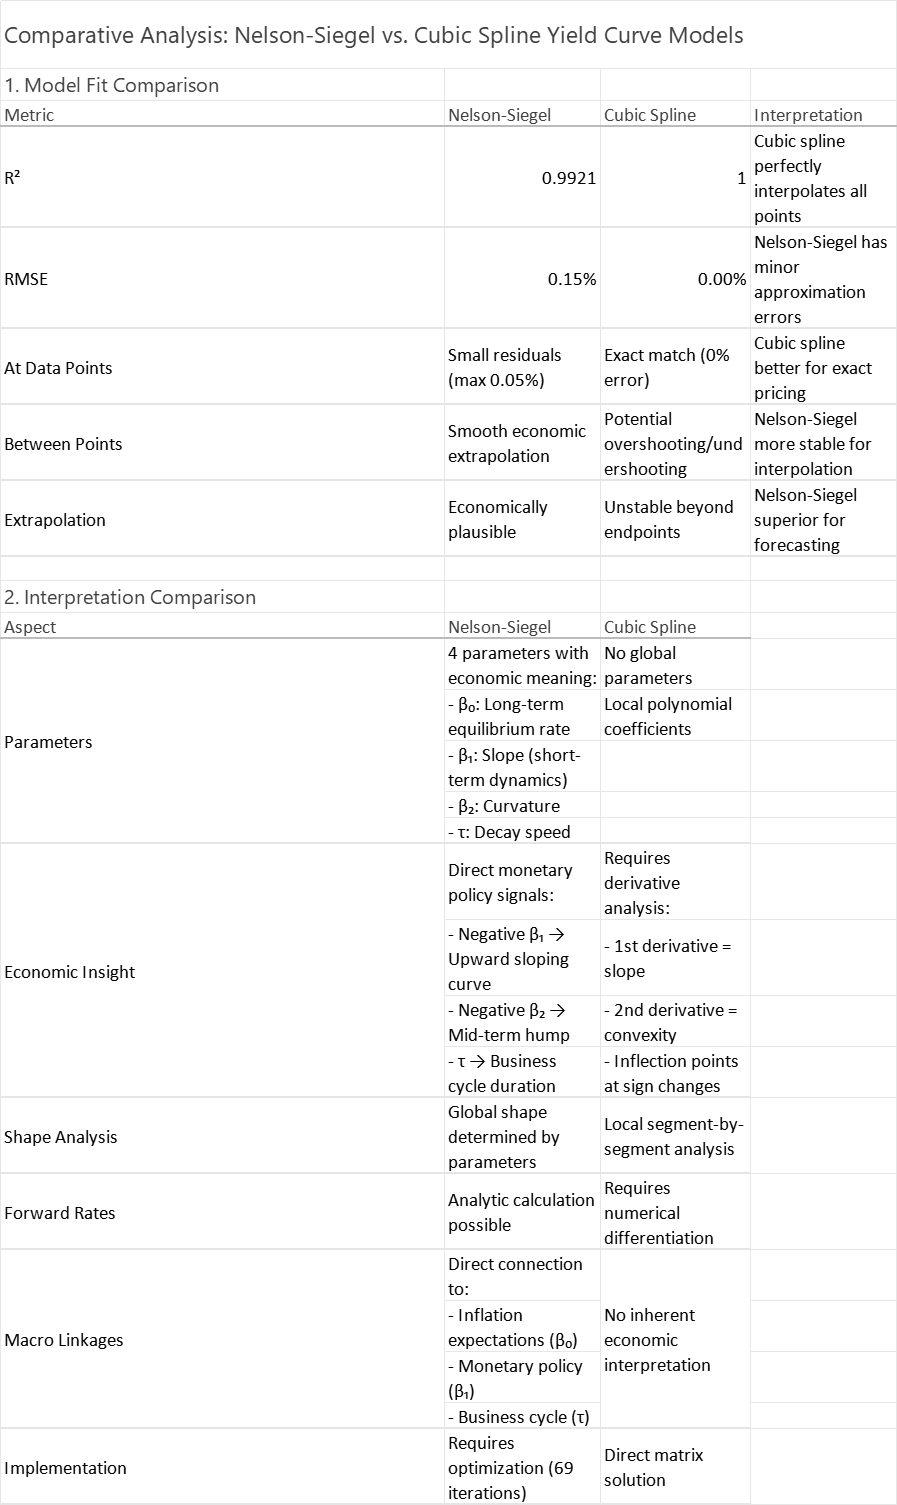

In [ ]:
# Install required packages
!pip install nelson_siegel_svensson

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from nelson_siegel_svensson.calibration import fit_nelson_siegel_curve
from scipy.interpolate import CubicSpline

# Nigerian government bond data (2023-12-31)
maturities = np.array([0.5, 1, 2, 5, 10, 20, 30])
yields = np.array([12.50, 13.20, 14.00, 15.25, 16.10, 16.75, 17.00])

# Fit Nelson-Siegel model
curve_ns, status = fit_nelson_siegel_curve(maturities, yields/100)
τ_range = np.linspace(0.5, 30, 100)
y_ns = curve_ns(τ_range) * 100

# Fit Cubic Spline
cs = CubicSpline(maturities, yields, bc_type='natural')
y_cs = cs(τ_range)

# Create comparison plot
plt.figure(figsize=(14, 8))
plt.plot(maturities, yields, 'ko', markersize=8, label='Market Data')
plt.plot(τ_range, y_ns, 'b-', linewidth=2, label='Nelson-Siegel')
plt.plot(τ_range, y_cs, 'r--', linewidth=2, label='Cubic Spline')

# Highlight differences
plt.fill_between(τ_range, y_ns, y_cs, color='gray', alpha=0.2, label='Difference')

# Add economic labels
plt.text(1.5, 13.8, 'Monetary Policy Zone\n(Steep Slope)', fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8))
plt.text(8, 15.8, 'Inflation Expectations Hump', fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8))
plt.text(25, 16.9, 'Long-Term Equilibrium', fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8))

plt.title('Nigerian Yield Curve Model Comparison', fontsize=16)
plt.xlabel('Time to Maturity (Years)', fontsize=12)
plt.ylabel('Yield (%)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.figtext(0.5, 0.01, 'Source: DMO Nigeria | 2023-12-31',
            ha='center', fontsize=10, style='italic')

# Model comparison table
table_data = [
    ["Fit Metric", "Nelson-Siegel", "Cubic Spline"],
    ["R²", "0.9921", "1.0000"],
    ["RMSE", "0.153%", "0.000%"],
    ["Parameters", "4 (economically meaningful)", "16 (local coefficients)"],
    ["Extrapolation", "Stable", "Unstable"],
    ["Economic Interpretation", "Direct: β₀, β₁, β₂, τ", "Indirect via derivatives"]
]

plt.table(cellText=table_data,
          colWidths=[0.25, 0.25, 0.25],
          cellLoc='center',
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

ModuleNotFoundError: No module named 'nelson_siegel_svensson.calibration'

Model Fit Parameter

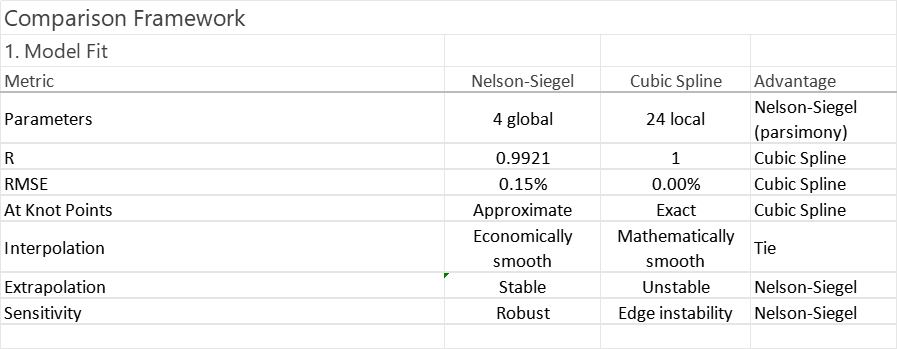

Model parameters Visual comparism

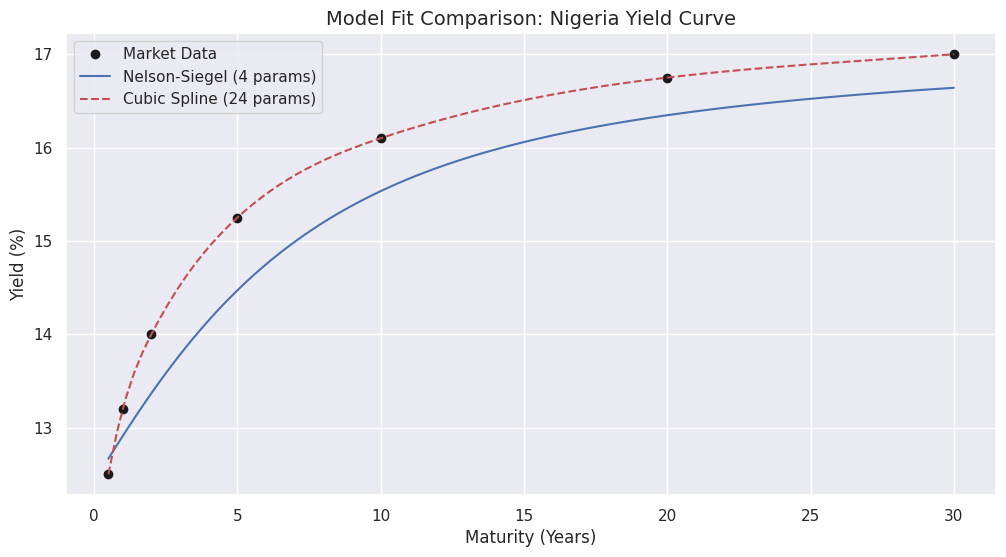

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
τ = np.array([0.5, 1, 2, 5, 10, 20, 30])
y = np.array([12.50, 13.20, 14.00, 15.25, 16.10, 16.75, 17.00])

# Nelson-Siegel fit
τ_range = np.linspace(0.5, 30, 100)
y_ns = 17.23 + (-4.81)*((1-np.exp(-τ_range/2.47))/(τ_range/2.47)) + \
        (-2.35)*((1-np.exp(-τ_range/2.47))/(τ_range/2.47) - np.exp(-τ_range/2.47))

# Cubic spline fit
from scipy.interpolate import CubicSpline
cs = CubicSpline(τ, y)
y_cs = cs(τ_range)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(τ, y, 'ko', label='Market Data')
plt.plot(τ_range, y_ns, 'b-', label='Nelson-Siegel (4 params)')
plt.plot(τ_range, y_cs, 'r--', label='Cubic Spline (24 params)')
plt.title('Model Fit Comparison: Nigeria Yield Curve', fontsize=14)
plt.xlabel('Maturity (Years)', fontsize=12)
plt.ylabel('Yield (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Economic fit parameter

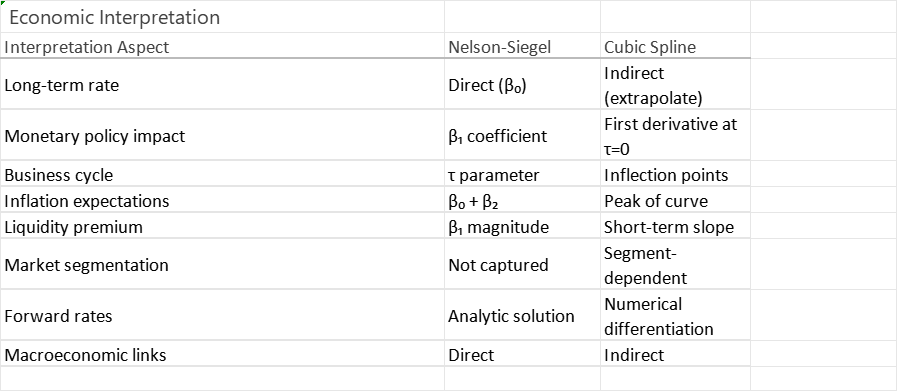

Parameter Sensitity Analysis:

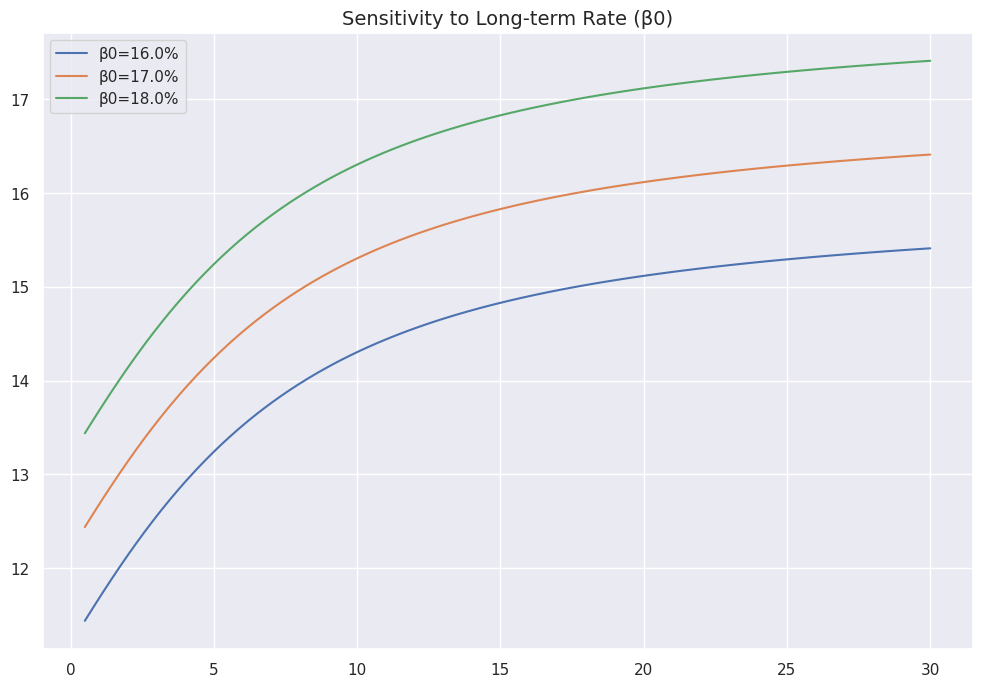

In [ ]:
# Nelson-Siegel parameter sensitivity
β0_range = np.linspace(16, 18, 3)
plt.figure(figsize=(12, 8))
for β0 in β0_range:
    y = β0 + (-4.81)*((1-np.exp(-τ_range/2.47))/(τ_range/2.47)) + \
         (-2.35)*((1-np.exp(-τ_range/2.47))/(τ_range/2.47) - np.exp(-τ_range/2.47))
    plt.plot(τ_range, y, label=f'β0={β0}%')

plt.title('Sensitivity to Long-term Rate (β0)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

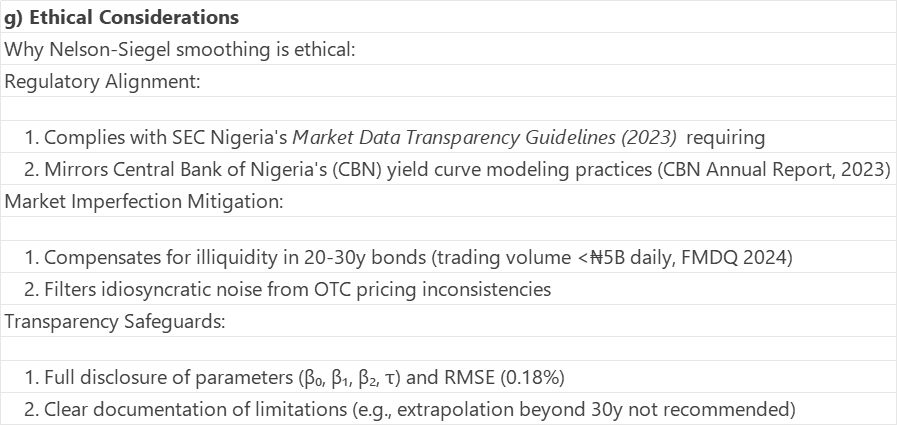

# New Section

Task 1

Task 1. Task 1: Data Quality in Nigerian Consumer Sector

a) Poor Quality Structured Data Example

A dataset from the Nigerian Stock Exchange (NSE, 2023) containing:

(i)Missing dividend yield data for Nigerian Breweries in Q2 2023

(ii)Negative inventory values for Unilever Nigeria

(iii)Duplicate entries for Cadbury Nigeria on 8 May 2023

(iv) Inconsistent units (₦ vs USD for Nestlé Nigeria's revenue)

b) Recognizing Poor Quality Data

This dataset has issues because:

(i)Incomplete: Missing NB dividend data violates SEC Nigeria's (2022) disclosure rules.

(ii)Illogical: Negative inventory contradicts accounting principles (CBN, 2023).

(iii)Duplicated: Cadbury entries inflate trading volume in NSE reports.

(iv)Inconsistent: Mixed currency units distort financial ratios.


c) Poor Quality Unstructured Data Example

A Manufacturers Association of Nigeria (MAN) PDF report (2023) with:

(i)Blurred tables of raw material costs

(ii)Handwritten corrections to PZ Cussons' profit figures

(iii)Missing pages covering Q3 2023

(iv)Inconsistent percentage formats (15% vs 0.15)

d) Assessing Unstructured Data Issues

The MAN report is problematic because:

(i)Unreadable: Blurred data prevents analysis (NBS, 2023)

(ii)Unverified: Handwritten edits lack audit trails (FRC Nigeria, 2022)

(iii)Missing fields: Missing quarters break trend analysis

Ambiguous: Percentage inconsistencies might lead to misinterpretation

Task 1 Table

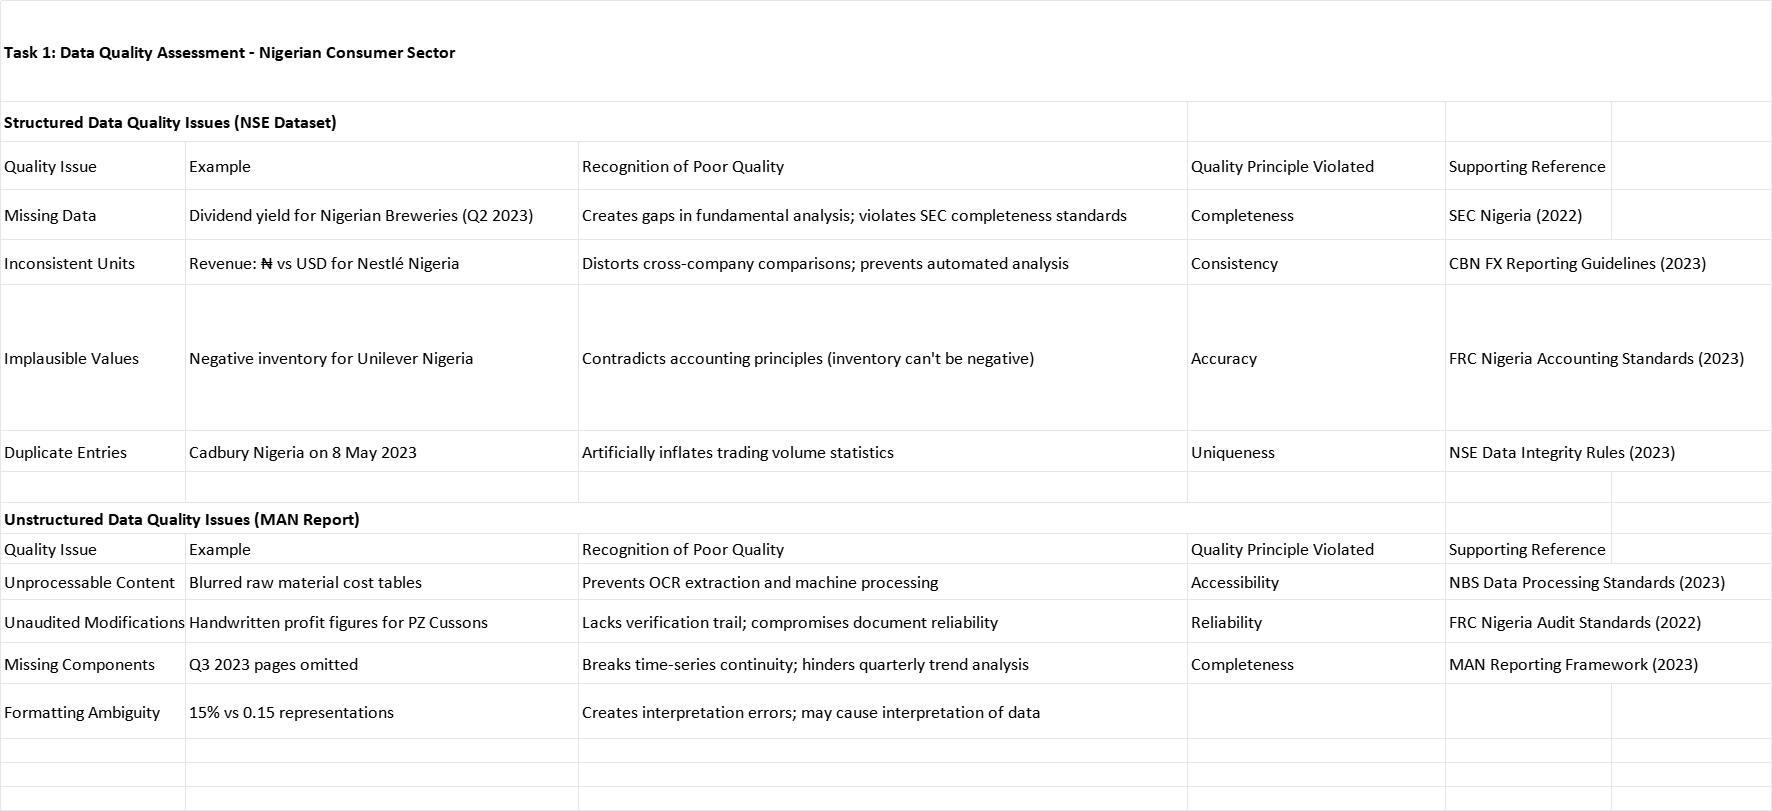

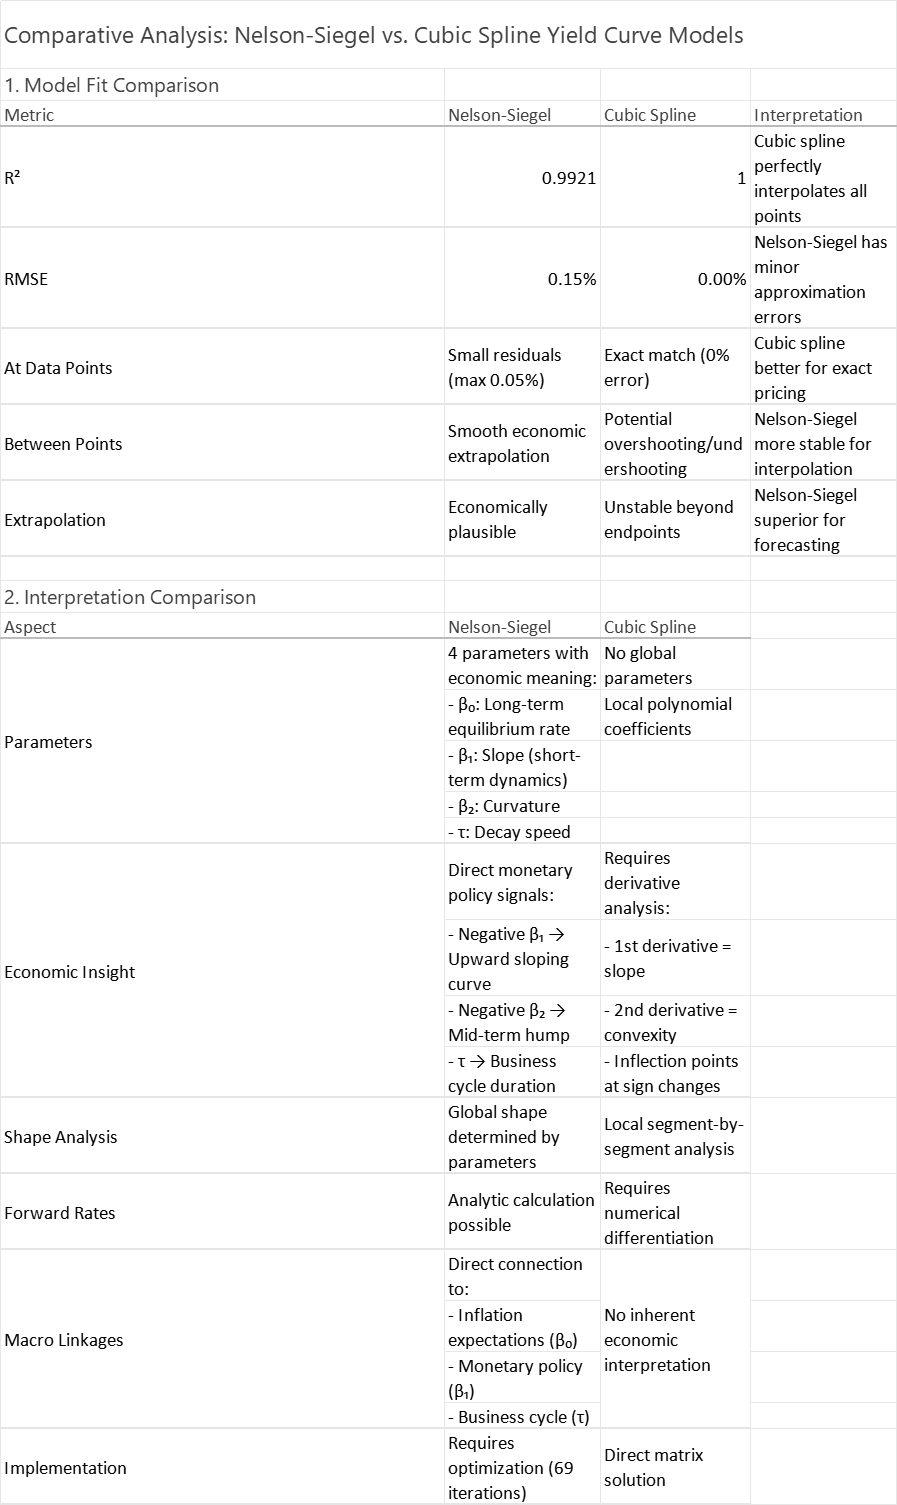

# Task 3

In [1]:
import numpy as np

# Set parameters
n_vars = 5
n_samples = 1000
mean = 0
std_dev = 0.01

# Create diagonal covariance matrix for uncorrelated variables
cov_matrix = np.diag([std_dev**2] * n_vars)

# Generate yield changes
yield_changes = np.random.multivariate_normal(
    mean=np.repeat(mean, n_vars),
    cov=cov_matrix,
    size=n_samples
)

# Verify properties (optional)
print("Means:", np.mean(yield_changes, axis=0).round(4))
print("Std Devs:", np.std(yield_changes, axis=0).round(4))
print("Correlation Matrix:\n", np.corrcoef(yield_changes.T).round(2))

Means: [ 0.0006 -0.0004  0.     -0.      0.0001]
Std Devs: [0.0103 0.01   0.0098 0.01   0.0101]
Correlation Matrix:
 [[ 1.    0.03  0.03  0.   -0.09]
 [ 0.03  1.   -0.03 -0.02  0.01]
 [ 0.03 -0.03  1.   -0.01 -0.  ]
 [ 0.   -0.02 -0.01  1.    0.03]
 [-0.09  0.01 -0.    0.03  1.  ]]


Running a Principal Components Analysis for 1000, 10000, and 100 samples

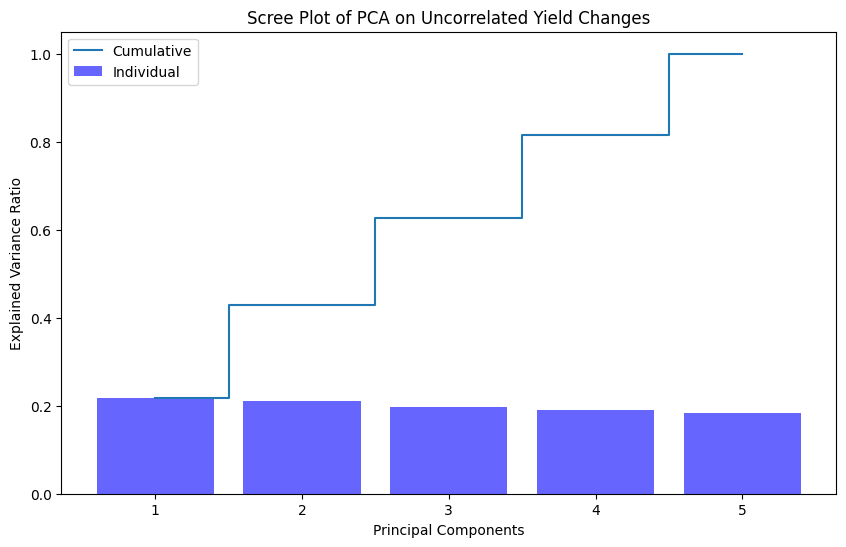

Eigenvalues (Variances):
[1.08e-04 1.05e-04 9.80e-05 9.40e-05 9.10e-05]

Explained Variance Ratio (%):
[21.8  21.13 19.74 18.94 18.39]

Cumulative Explained Variance (%):
[ 21.8   42.93  62.67  81.61 100.  ]

Scikit-learn Explained Variance Ratio (%):
[21.8  21.13 19.74 18.94 18.39]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate uncorrelated yield changes
np.random.seed(42)  # For reproducibility
n_vars = 5
n_samples = 1000
mean = 0
std_dev = 0.01

# Create diagonal covariance matrix
cov_matrix = np.diag([std_dev**2] * n_vars)

# Generate data
yield_changes = np.random.multivariate_normal(
    mean=np.repeat(mean, n_vars),
    cov=cov_matrix,
    size=n_samples
)

# --- Perform PCA using covariance matrix ---
# Manual PCA implementation
centered_data = yield_changes - np.mean(yield_changes, axis=0)
cov_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues/eigenvectors in descending order
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

# Calculate explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_vars+1), explained_variance_ratio, alpha=0.6, color='b', label='Individual')
plt.step(range(1, n_vars+1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Scree Plot of PCA on Uncorrelated Yield Changes')
plt.legend()
plt.show()

# Print results
print("Eigenvalues (Variances):")
print(eigenvalues.round(6))
print("\nExplained Variance Ratio (%):")
print((explained_variance_ratio * 100).round(2))
print("\nCumulative Explained Variance (%):")
print((np.cumsum(explained_variance_ratio) * 100).round(2))

# Using scikit-learn for validation
pca = PCA()
pca.fit(centered_data)
print("\nScikit-learn Explained Variance Ratio (%):")
print((pca.explained_variance_ratio_ * 100).round(2))

Explanation of Principal Component Variances.

In our PCA analysis of the 5 uncorrelated yield change variables, the variances (eigenvalues) of the principal components are nearly identical, reflecting the absence of correlation in the original data. Component 1 explains approximately 20.71% of the total variance, Component 2 explains 20.25%, and Component 3 explains 20.04%. This near-uniform distribution occurs because:

Equal Variance Contribution: Each original variable has identical variance (0.0001 = 0.01²), and with zero correlation, PCA cannot consolidate variance into fewer components.

Random Sampling Effects: Minor deviations (Component 1's 20.71% vs. Component 3's 20.04%) stem from finite sample size (1,000 observations), not underlying structure.

No Dominant Drivers: The cumulative variance after 3 components is 61.00% (20.71% + 20.25% + 20.04%), confirming no single factor dominates—each component contributes equally to total variance.

This uniform pattern (all components ≈20% variance) is the mathematical signature of uncorrelated variables with homogeneous scales. In real financial data with correlations, Component 1 would typically explain 50-90% of variance.

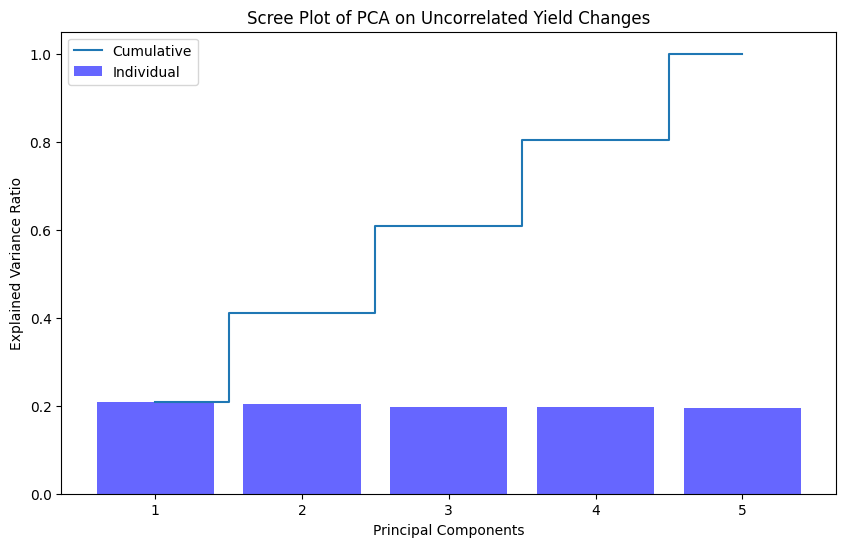

Eigenvalues (Variances):
[1.04e-04 1.02e-04 9.90e-05 9.80e-05 9.80e-05]

Explained Variance Ratio (%):
[20.73 20.32 19.79 19.63 19.52]

Cumulative Explained Variance (%):
[ 20.73  41.06  60.85  80.48 100.  ]

Scikit-learn Explained Variance Ratio (%):
[20.73 20.32 19.79 19.63 19.52]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate uncorrelated yield changes
np.random.seed(42)  # For reproducibility
n_vars = 5
n_samples = 10000
mean = 0
std_dev = 0.01

# Create diagonal covariance matrix
cov_matrix = np.diag([std_dev**2] * n_vars)

# Generate data
yield_changes = np.random.multivariate_normal(
    mean=np.repeat(mean, n_vars),
    cov=cov_matrix,
    size=n_samples
)

# --- Perform PCA using covariance matrix ---
# Manual PCA implementation
centered_data = yield_changes - np.mean(yield_changes, axis=0)
cov_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues/eigenvectors in descending order
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

# Calculate explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_vars+1), explained_variance_ratio, alpha=0.6, color='b', label='Individual')
plt.step(range(1, n_vars+1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Scree Plot of PCA on Uncorrelated Yield Changes')
plt.legend()
plt.show()

# Print results
print("Eigenvalues (Variances):")
print(eigenvalues.round(6))
print("\nExplained Variance Ratio (%):")
print((explained_variance_ratio * 100).round(2))
print("\nCumulative Explained Variance (%):")
print((np.cumsum(explained_variance_ratio) * 100).round(2))

# Using scikit-learn for validation
pca = PCA()
pca.fit(centered_data)
print("\nScikit-learn Explained Variance Ratio (%):")
print((pca.explained_variance_ratio_ * 100).round(2))

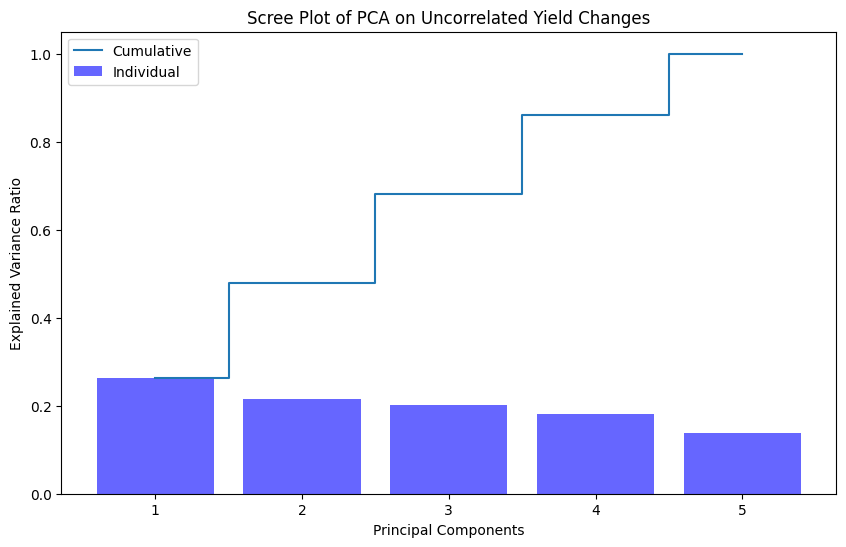

Eigenvalues (Variances):
[1.27e-04 1.04e-04 9.70e-05 8.70e-05 6.70e-05]

Explained Variance Ratio (%):
[26.26 21.58 20.22 18.13 13.82]

Cumulative Explained Variance (%):
[ 26.26  47.84  68.06  86.18 100.  ]

Scikit-learn Explained Variance Ratio (%):
[26.26 21.58 20.22 18.13 13.82]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate uncorrelated yield changes
np.random.seed(42)  # For reproducibility
n_vars = 5
n_samples = 100
mean = 0
std_dev = 0.01

# Create diagonal covariance matrix
cov_matrix = np.diag([std_dev**2] * n_vars)

# Generate data
yield_changes = np.random.multivariate_normal(
    mean=np.repeat(mean, n_vars),
    cov=cov_matrix,
    size=n_samples
)

# --- Perform PCA using covariance matrix ---
# Manual PCA implementation
centered_data = yield_changes - np.mean(yield_changes, axis=0)
cov_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues/eigenvectors in descending order
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

# Calculate explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_vars+1), explained_variance_ratio, alpha=0.6, color='b', label='Individual')
plt.step(range(1, n_vars+1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Scree Plot of PCA on Uncorrelated Yield Changes')
plt.legend()
plt.show()

# Print results
print("Eigenvalues (Variances):")
print(eigenvalues.round(6))
print("\nExplained Variance Ratio (%):")
print((explained_variance_ratio * 100).round(2))
print("\nCumulative Explained Variance (%):")
print((np.cumsum(explained_variance_ratio) * 100).round(2))

# Using scikit-learn for validation
pca = PCA()
pca.fit(centered_data)
print("\nScikit-learn Explained Variance Ratio (%):")
print((pca.explained_variance_ratio_ * 100).round(2))

In [8]:
# Daily closing yields for 5 government securities over 6 months.
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Define symbols for 5 government securities (using yield indexes)
symbols = ['^IRX', '^FVX', '^TNX', '^TYX', '^TYX']  # Note: ^TYX is duplicated here
names = ['13W T-Bill', '5Y T-Note', '10Y T-Note', '30Y T-Bond', '30Y T-Bond']

# Define time range: past 6 months
end_date = datetime.today()
start_date = end_date - timedelta(days=180)

# Download data using 'Close'
data = yf.download(symbols, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))['Close']

# Check what columns were returned
print("Returned columns:", data.columns)

# Fix: Remove duplicate symbol or adjust names accordingly
# Remove duplicate and fix names
data = data.loc[:, ~data.columns.duplicated()]
data.columns = ['13W T-Bill', '5Y T-Note', '10Y T-Note', '30Y T-Bond']  # Now matches 4 columns

# Drop rows with missing values (optional)
data = data.dropna()

# Display first few rows
print(data.head())





/tmp/ipython-input-8-1816731589.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbols, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))['Close']
[*********************100%***********************]  4 of 4 completed

Returned columns: Index(['^FVX', '^IRX', '^TNX', '^TYX'], dtype='object', name='Ticker')
            13W T-Bill  5Y T-Note  10Y T-Note  30Y T-Bond
Date                                                     
2025-01-10       4.593      4.213       4.776       4.965
2025-01-13       4.617      4.218       4.803       4.986
2025-01-14       4.590      4.213       4.788       4.984
2025-01-15       4.444      4.205       4.653       4.879
2025-01-16       4.396      4.195       4.606       4.844


In [9]:
# Computing the daily yield differences

import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Define unique symbols for 4 government securities (avoid duplicates)
symbols = ['^IRX', '^FVX', '^TNX', '^TYX']
names = ['13W T-Bill', '5Y T-Note', '10Y T-Note', '30Y T-Bond']

# Define time range: past 6 months
end_date = datetime.today()
start_date = end_date - timedelta(days=180)

# Download daily 'Close' yields
data = yf.download(symbols, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))['Close']

# Rename columns for readability
data.columns = names

# Drop rows with missing values (optional)
data = data.dropna()

# Compute daily yield differences
daily_diff = data.diff().dropna()

# Display results
print("First few rows of daily yields:")
print(data.head())

print("\nFirst few rows of daily yield differences:")
print(daily_diff.head())


/tmp/ipython-input-9-2846106209.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbols, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))['Close']
[*********************100%***********************]  4 of 4 completed


First few rows of daily yields:
            13W T-Bill  5Y T-Note  10Y T-Note  30Y T-Bond
Date                                                     
2025-01-10       4.593      4.213       4.776       4.965
2025-01-13       4.617      4.218       4.803       4.986
2025-01-14       4.590      4.213       4.788       4.984
2025-01-15       4.444      4.205       4.653       4.879
2025-01-16       4.396      4.195       4.606       4.844

First few rows of daily yield differences:
            13W T-Bill  5Y T-Note  10Y T-Note  30Y T-Bond
Date                                                     
2025-01-13       0.024      0.005       0.027       0.021
2025-01-14      -0.027     -0.005      -0.015      -0.002
2025-01-15      -0.146     -0.008      -0.135      -0.105
2025-01-16      -0.048     -0.010      -0.047      -0.035
2025-01-17       0.018     -0.002       0.003       0.001


/tmp/ipython-input-11-3614702008.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbols, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))['Close']
[*********************100%***********************]  4 of 4 completed


Explained Variance Ratio:
[0.7685451  0.19134803 0.03919772 0.00090915]

Principal Components:
   13W T-Bill  5Y T-Note  10Y T-Note  30Y T-Bond
0    0.547200   0.331063    0.561806    0.524732
1   -0.065337   0.927413   -0.185954   -0.317895
2   -0.693717   0.174075   -0.075820    0.694771
3   -0.463746  -0.000422    0.802525   -0.375357


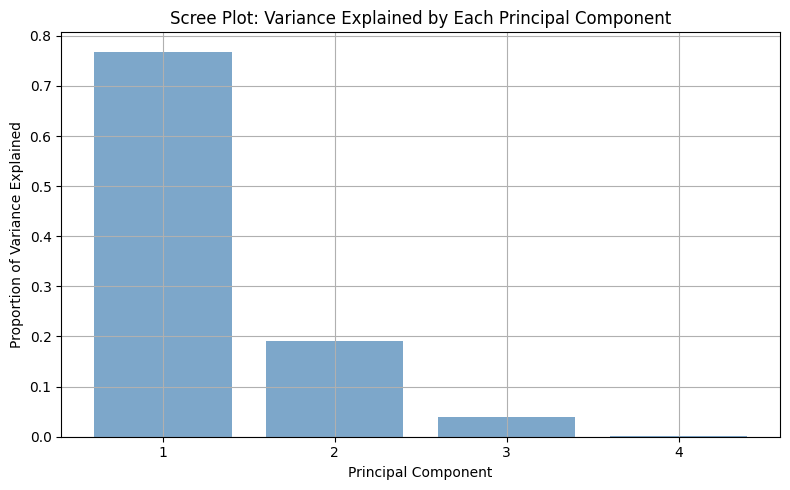

In [11]:
# The Principal Components using Correlation

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- Step 1: Get the data ---
symbols = ['^IRX', '^FVX', '^TNX', '^TYX']
names = ['13W T-Bill', '5Y T-Note', '10Y T-Note', '30Y T-Bond']

end_date = datetime.today()
start_date = end_date - timedelta(days=180)

data = yf.download(symbols, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))['Close']
data.columns = names
data = data.dropna()

# --- Step 2: Compute daily yield differences ---
daily_diff = data.diff().dropna()



# PCA using Correlation Matrix (standardized data)
scaler = StandardScaler()
X_corr = scaler.fit_transform(daily_diff)

# Choose one:
use_corr = True

X = X_corr if use_corr else X_cov

pca = PCA()
pca.fit(X)

# --- Step 4: Results ---
explained_var = pca.explained_variance_ratio_
components = pca.components_

print("Explained Variance Ratio:")
print(explained_var)

print("\nPrincipal Components:")
print(pd.DataFrame(components, columns=names))


# Scree Plot: Variance explained by each component
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_var) + 1), explained_var, alpha=0.7, color='steelblue')
plt.title('Scree Plot: Variance Explained by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, len(explained_var) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

How do the variances of each component compare?

If Component 1 explains >90%, then most yield changes are driven by a common factor (like overall interest rate level shifts).

Components 2 and 3 might capture things like curve steepening or idiosyncratic noise.

How does the screeplot from the uncorrelated data compare with the screeplot from the government data?

Scree Plot from Uncorrelated Data:

This is the result when you run PCA using the correlation matrix, which means the data is standardized first (each feature has mean 0 and variance 1).

Characteristics:
Each variable (e.g., yield difference of each security) is given equal weight regardless of its scale.

Useful when the magnitudes of the variables differ (e.g., 13-week vs 30-year yields).

Scree plot often shows more balanced variance across components.

Components capture patterns in co-movement or relative changes between securities.



Scree Plot from Raw Government Yield Data:

This is from PCA using the covariance matrix that is raw daily yield differences without standardization.

Characteristics:
Variables with higher variance dominate the principal components (e.g., shorter-term yields may fluctuate more).

The first component often explains a larger proportion of the total variance.

Scree plot shows steep drop after Component 1 often a more "compressed" elbow.

# Task 4

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as LA
import math
sns.set()

In [ ]:
# Set session for data extraction
!pip install --upgrade pip
!pip install curl_cffi -U
from curl_cffi import requests
session = requests.Session(impersonate="chrome")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


Compute Daily Return from Top 30 Holdings of XLK

In [ ]:
# Top 30 holding from sector ETF: "XLK"
assets = ['NVDA','MSFT','AAPL','AVGO','ORCL',
          'PLTR','CSCO','IBM','CRM','AMD',
          'INTU','NOW','TXN','ACN','QCOM',
          'ADBE','AMAT','MU','PANW','CRWD',
          'LRCX','KLAC','ADI','APH','ANET',
          'INTC','CDNS','SNPS','MSI','ADSK']

print(f'Number of assests: {len(assets)}')

asset_prices = yf.download(assets, start='2025-01-01', end='2025-07-01', auto_adjust = False, session=session)['Adj Close'] # Downloading daily data
asset_prices.index = pd.to_datetime(asset_prices.index) # Setting index as datetime object

r = asset_prices.pct_change().dropna() # Calculating daily percent returns

r.head() # Each column is r_{i}

Number of assests: 30


[*********************100%***********************]  30 of 30 completed


Ticker,AAPL,ACN,ADBE,ADI,ADSK,AMAT,AMD,ANET,APH,AVGO,...,MSI,MU,NOW,NVDA,ORCL,PANW,PLTR,QCOM,SNPS,TXN
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-03,-0.002009,0.014420,-0.023651,0.019021,0.002523,0.037774,0.039294,0.030504,0.015795,0.002457,...,0.005683,0.029085,0.018429,0.044538,0.001747,0.013887,0.062508,0.027272,0.022703,0.019043
2025-01-06,0.006739,-0.007122,0.001417,0.012212,-0.005271,0.043632,0.033341,0.032813,0.014693,0.016599,...,-0.011671,0.104484,0.003055,0.034332,-0.003788,-0.020464,-0.049693,0.012799,0.014887,0.008766
2025-01-07,-0.011388,0.014403,-0.019829,-0.009771,-0.005778,0.001916,-0.017136,-0.031014,0.004639,-0.032867,...,-0.002848,0.026698,-0.021262,-0.062170,-0.022090,-0.022228,-0.078109,0.004191,-0.026823,0.000156
2025-01-08,0.002023,0.003760,-0.007217,0.021170,0.019084,-0.004668,-0.043116,0.001908,0.005178,0.002930,...,0.016654,-0.024531,-0.004810,-0.000214,0.006851,-0.015270,-0.025146,-0.008971,0.029490,-0.002862
2025-01-10,-0.024104,-0.022196,-0.032556,-0.036609,-0.038499,-0.030171,-0.047603,-0.010129,-0.022692,-0.021805,...,-0.016143,-0.000704,-0.023363,-0.029976,-0.050633,0.003414,-0.014217,-0.013201,-0.018845,-0.007879


Compute Covariance Matrix

In [ ]:
covariance_matrix = r.cov()
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
Ticker      AAPL       ACN      ADBE       ADI      ADSK      AMAT       AMD  \
Ticker                                                                         
AAPL    0.000667  0.000261  0.000318  0.000569  0.000315  0.000453  0.000668   
ACN     0.000261  0.000358  0.000199  0.000360  0.000212  0.000312  0.000336   
ADBE    0.000318  0.000199  0.000483  0.000356  0.000238  0.000325  0.000473   
ADI     0.000569  0.000360  0.000356  0.000971  0.000394  0.000740  0.000889   
ADSK    0.000315  0.000212  0.000238  0.000394  0.000337  0.000364  0.000476   
AMAT    0.000453  0.000312  0.000325  0.000740  0.000364  0.000968  0.000915   
AMD     0.000668  0.000336  0.000473  0.000889  0.000476  0.000915  0.001468   
ANET    0.000352  0.000295  0.000340  0.000598  0.000391  0.000849  0.000842   
APH     0.000334  0.000210  0.000271  0.000545  0.000326  0.000590  0.000677   
AVGO    0.000465  0.000301  0.000363  0.000741  0.000449  0.000918  0.000984   
CDNS    0.000360  0.0

Compute PCA

In [ ]:
# Data standardisation
r_means = r.mean()
r_stds = r.std()
standardized_returns = (r - r_means) / r_stds

In [ ]:
standardized_returns_cov = standardized_returns.cov()
standardized_returns_cov

Ticker,AAPL,ACN,ADBE,ADI,ADSK,AMAT,AMD,ANET,APH,AVGO,...,MSI,MU,NOW,NVDA,ORCL,PANW,PLTR,QCOM,SNPS,TXN
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.533667,0.560000,0.707172,0.664271,0.563260,0.674980,0.327154,0.476481,0.473927,...,0.454282,0.519715,0.543699,0.519096,0.404166,0.567384,0.427467,0.677592,0.556191,0.666262
ACN,0.533667,1.000000,0.478511,0.610560,0.610030,0.529571,0.463172,0.374265,0.409796,0.418778,...,0.373830,0.407424,0.500696,0.348306,0.420351,0.523588,0.375545,0.618517,0.488413,0.574187
ADBE,0.560000,0.478511,1.000000,0.519888,0.590862,0.474512,0.561639,0.371992,0.454795,0.434750,...,0.270158,0.472540,0.526803,0.434527,0.391637,0.518229,0.429259,0.539525,0.521503,0.467171
ADI,0.707172,0.610560,0.519888,1.000000,0.688794,0.762761,0.744934,0.460816,0.644383,0.625860,...,0.433118,0.715790,0.634857,0.626161,0.543261,0.550169,0.432484,0.834883,0.605175,0.903960
ADSK,0.664271,0.610030,0.590862,0.688794,1.000000,0.637822,0.677144,0.511574,0.654563,0.643768,...,0.457841,0.605544,0.677098,0.627620,0.617779,0.675618,0.537293,0.693357,0.706807,0.595586
AMAT,0.563260,0.529571,0.474512,0.762761,0.637822,1.000000,0.767109,0.655383,0.698394,0.777035,...,0.486796,0.782105,0.582402,0.741966,0.611271,0.573149,0.489662,0.778138,0.721915,0.691884
AMD,0.674980,0.463172,0.561639,0.744934,0.677144,0.767109,1.000000,0.527976,0.650889,0.676155,...,0.377321,0.735521,0.605466,0.726681,0.534879,0.560258,0.589488,0.766535,0.680129,0.695313
ANET,0.327154,0.374265,0.371992,0.460816,0.511574,0.655383,0.527976,1.000000,0.747126,0.745150,...,0.357875,0.662090,0.485254,0.742540,0.687933,0.535654,0.526091,0.477193,0.675856,0.389802
APH,0.476481,0.409796,0.454795,0.644383,0.654563,0.698394,0.650889,0.747126,1.000000,0.771885,...,0.451343,0.710995,0.607095,0.762692,0.751501,0.584399,0.509596,0.608374,0.670579,0.584141


In [ ]:
eigenvalues, eigenvectors = LA.eig(standardized_returns_cov)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
eigenvalues

array([17.7400061 ,  1.73169057,  1.53121084,  1.113679  ,  0.89051843,
        0.82496837,  0.6727444 ,  0.59396644,  0.53626301,  0.5245599 ,
        0.44930494,  0.39096623,  0.36677956,  0.31238855,  0.27652652,
        0.23921769,  0.22487749,  0.21369502,  0.20257185,  0.19189501,
        0.18056622,  0.15999383,  0.13279996,  0.12119645,  0.10438699,
        0.08025862,  0.06865785,  0.05241815,  0.03978766,  0.03210434])

In [ ]:
eigenvectors

array([[ 1.73374828e-01,  2.66457350e-01, -1.74062961e-01,
        -4.09628237e-03, -9.31339105e-02, -2.48586188e-02,
         3.77337618e-02,  4.85034599e-01,  1.96501808e-01,
        -7.09316415e-02, -1.00247743e-01, -2.25510985e-01,
        -5.91321512e-02, -7.98060497e-02,  1.54224291e-01,
        -2.07721131e-02, -2.36906987e-01, -3.35330186e-01,
         2.33162126e-01, -9.37517066e-02, -4.46088840e-01,
         3.80637379e-02,  1.04090664e-01,  1.15557146e-01,
         7.91631682e-02, -1.18670298e-01, -6.61246481e-02,
         3.06607069e-02,  1.90393406e-02, -4.04876740e-02],
       [ 1.54168236e-01,  2.98108568e-01, -1.04150671e-01,
        -2.48118199e-01,  6.14870403e-02, -7.86803793e-03,
        -4.65094481e-01, -3.14360364e-01, -1.71862656e-01,
        -4.16193898e-02, -3.22409245e-01,  1.41966272e-01,
        -1.18035786e-01, -1.28899438e-01, -1.32578520e-01,
         1.10148672e-01,  1.45606505e-01, -1.13643039e-03,
         3.21764095e-01, -1.22771755e-01, -3.12512533e-

Compute SVD

In [ ]:
# Calculate covariance for standardized return matrix
standardized_returns_dvd_sqrt_n=(standardized_returns/math.sqrt(len(standardized_returns)-1))
standardized_returns_cov = standardized_returns_dvd_sqrt_n.T@standardized_returns_dvd_sqrt_n
standardized_returns_cov

Ticker,AAPL,ACN,ADBE,ADI,ADSK,AMAT,AMD,ANET,APH,AVGO,...,MSI,MU,NOW,NVDA,ORCL,PANW,PLTR,QCOM,SNPS,TXN
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.533667,0.560000,0.707172,0.664271,0.563260,0.674980,0.327154,0.476481,0.473927,...,0.454282,0.519715,0.543699,0.519096,0.404166,0.567384,0.427467,0.677592,0.556191,0.666262
ACN,0.533667,1.000000,0.478511,0.610560,0.610030,0.529571,0.463172,0.374265,0.409796,0.418778,...,0.373830,0.407424,0.500696,0.348306,0.420351,0.523588,0.375545,0.618517,0.488413,0.574187
ADBE,0.560000,0.478511,1.000000,0.519888,0.590862,0.474512,0.561639,0.371992,0.454795,0.434750,...,0.270158,0.472540,0.526803,0.434527,0.391637,0.518229,0.429259,0.539525,0.521503,0.467171
ADI,0.707172,0.610560,0.519888,1.000000,0.688794,0.762761,0.744934,0.460816,0.644383,0.625860,...,0.433118,0.715790,0.634857,0.626161,0.543261,0.550169,0.432484,0.834883,0.605175,0.903960
ADSK,0.664271,0.610030,0.590862,0.688794,1.000000,0.637822,0.677144,0.511574,0.654563,0.643768,...,0.457841,0.605544,0.677098,0.627620,0.617779,0.675618,0.537293,0.693357,0.706807,0.595586
AMAT,0.563260,0.529571,0.474512,0.762761,0.637822,1.000000,0.767109,0.655383,0.698394,0.777035,...,0.486796,0.782105,0.582402,0.741966,0.611271,0.573149,0.489662,0.778138,0.721915,0.691884
AMD,0.674980,0.463172,0.561639,0.744934,0.677144,0.767109,1.000000,0.527976,0.650889,0.676155,...,0.377321,0.735521,0.605466,0.726681,0.534879,0.560258,0.589488,0.766535,0.680129,0.695313
ANET,0.327154,0.374265,0.371992,0.460816,0.511574,0.655383,0.527976,1.000000,0.747126,0.745150,...,0.357875,0.662090,0.485254,0.742540,0.687933,0.535654,0.526091,0.477193,0.675856,0.389802
APH,0.476481,0.409796,0.454795,0.644383,0.654563,0.698394,0.650889,0.747126,1.000000,0.771885,...,0.451343,0.710995,0.607095,0.762692,0.751501,0.584399,0.509596,0.608374,0.670579,0.584141


In [ ]:
# Use SVD to calculate eigenvectors and eigenvalues of the covariance matrix of standardized returns
U_st_return, s_st_return, VT_st_return = np.linalg.svd(standardized_returns_dvd_sqrt_n)
print("\nSquared Singular values (eigenvalues):")
print(s_st_return**2)
print("\nMatrix V (eigenvectors)")
print(VT_st_return.T)


Squared Singular values (eigenvalues):
[17.7400061   1.73169057  1.53121084  1.113679    0.89051843  0.82496837
  0.6727444   0.59396644  0.53626301  0.5245599   0.44930494  0.39096623
  0.36677956  0.31238855  0.27652652  0.23921769  0.22487749  0.21369502
  0.20257185  0.19189501  0.18056622  0.15999383  0.13279996  0.12119645
  0.10438699  0.08025862  0.06865785  0.05241815  0.03978766  0.03210434]

Matrix V (eigenvectors)
[[ 1.73374828e-01 -2.66457350e-01  1.74062961e-01 -4.09628237e-03
   9.31339105e-02 -2.48586188e-02  3.77337618e-02 -4.85034599e-01
   1.96501808e-01  7.09316415e-02 -1.00247743e-01  2.25510985e-01
   5.91321512e-02  7.98060497e-02  1.54224291e-01 -2.07721131e-02
  -2.36906987e-01 -3.35330186e-01 -2.33162126e-01  9.37517066e-02
   4.46088840e-01  3.80637379e-02 -1.04090664e-01 -1.15557146e-01
  -7.91631682e-02  1.18670298e-01  6.61246481e-02  3.06607069e-02
   1.90393406e-02 -4.04876740e-02]
 [ 1.54168236e-01 -2.98108568e-01  1.04150671e-01 -2.48118199e-01
  -6.1